In [2]:
%matplotlib inline
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy.ndimage.filters import laplace
from scipy.ndimage import (gaussian_gradient_magnitude, sobel, binary_dilation, binary_erosion,
                           maximum_filter, gaussian_laplace)

## mirror directory structure, create workspace dirs

In [44]:
# original dataset:
src_dir = '/net/people/plgmatisz/antibodies/data/original/'

# in this directory there will be crated two subtrees,
# one for renamed original files, the other one for numpy
# format representation of cleaned dataset
workspace_dir = '/net/scratch/people/plgmatisz/antibodies/'

renamed_dir = os.path.join(workspace_dir, 'renamed')
numpy_dir = os.path.join(workspace_dir, 'numpy')

os.mkdir(renamed_dir, mode=0o700)
os.mkdir(numpy_dir, mode=0o700)

for root, dirs, files in os.walk(src_dir):
    
    relative_path = root.split(src_dir)[-1]
    
    for d in dirs:
        os.mkdir(os.path.join(renamed_dir, d), mode=0o700)
        os.mkdir(os.path.join(numpy_dir, d), mode=0o700)

## copy files, delete whitespaces

In [45]:
%%time

for root, dirs, files in os.walk(src_dir):
    
    relative_root = root.split(src_dir)[-1]
        
    for f in files:
        old_fname = f.replace(' ', '\ ')
        new_fname = f.replace(' ', '')
        
        src_path = os.path.join(root, old_fname)
        dest_path = os.path.join(renamed_dir, relative_root, new_fname)
        
        os.system(f'cp {src_path} {dest_path}')

CPU times: user 26.6 ms, sys: 515 ms, total: 541 ms
Wall time: 3.99 s


## load images

In [3]:
def load(path, size_wh=None):
    """
    Load image file into numpy array.
    """
    img = Image.open(path)
    
    if size_wh is not None:
        img = img.resize(size_wh)
    
    return np.array(img)

def load_all(root, categories=None, size_wh=None, cluster=False):
    if categories is None:
        categories = os.listdir(root)
        
    result = {}
    for c in categories:
        cat_root = os.path.join(root, c)
        imgs = [load(os.path.join(cat_root, f), size_wh) for f in os.listdir(cat_root)]
        
        if cluster:
            imgs = np.array(imgs)
        
        result[c] = imgs
        
    return result

In [6]:
%%time
dataset_root = '/net/scratch/people/plgmatisz/antibodies/renamed'
loaded = load_all(dataset_root)

CPU times: user 2.39 s, sys: 1.24 s, total: 3.63 s
Wall time: 18.8 s


## display images

In [9]:
def display_batch(imgs, rows, cols, wh=None, **plot_kwargs):
    f, axes = plt.subplots(rows, cols)
    axes = axes.reshape(-1)
    
    if wh is not None:
        f.set_size_inches(wh)
    
    for img, a in zip(imgs, axes):
        a.imshow(img, **plot_kwargs)
        a.set_xticks([], [])
        a.set_yticks([], [])
        
    plt.show()

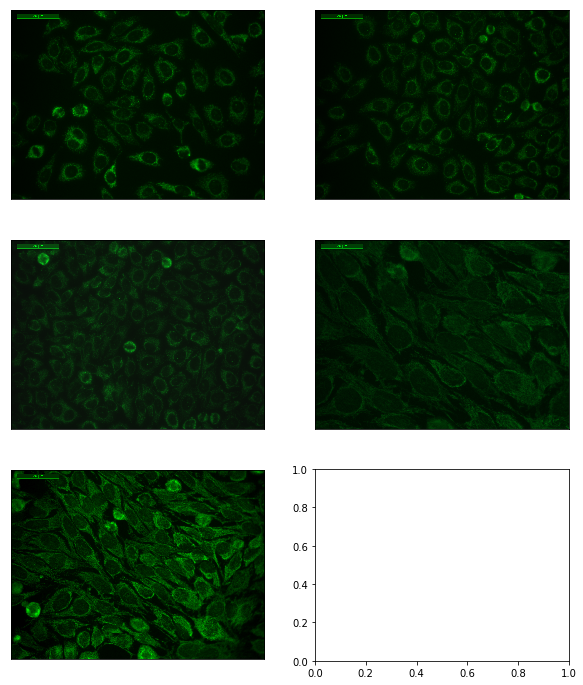

In [12]:
ama_batch = loaded['AMA']
display_batch(ama_batch, rows=3, cols=2, wh=(10, 12))

## detect tags

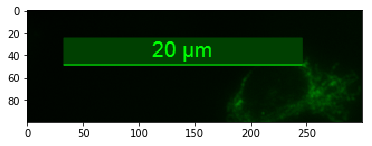

In [16]:
plt.imshow(ama_batch[0][:100, :300])

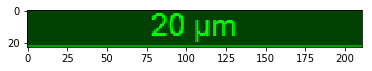

In [29]:
tag_template = ama_batch[0][26:49, 34:245]
plt.imshow(tag_template)

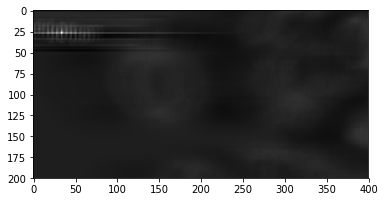

In [35]:
sample = ama_batch[1]
matching_result = cv2.matchTemplate(sample, tag_template, cv2.TM_CCOEFF)
plt.imshow(matching_result[:200, :400], cmap='gray')

In [40]:
_, max_val, _, max_loc = cv2.minMaxLoc(matching_result)
max_val, max_loc

(8873215.0, (34, 26))

In [146]:
neg_batch = load_batch(data_path + 'NEG')
ama_batch = load_batch(data_path + 'AMA')
nuc_batch = load_batch(data_path + 'nucleolar')

In [147]:
neg_batch[:, 23:51, 30:250] = 0
ama_batch[:, 23:51, 30:250] = 0
nuc_batch[:, 23:51, 30:250] = 0

CPU times: user 1.59 s, sys: 2.85 ms, total: 1.59 s
Wall time: 1.59 s


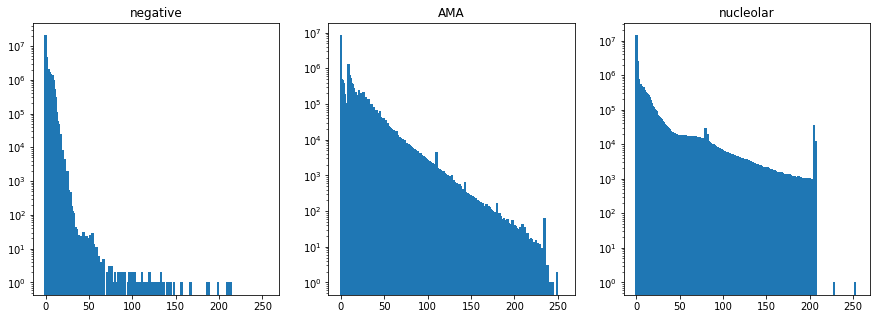

In [151]:
%%time

f, a = plt.subplots(1, 3)
f.set_size_inches(15, 5)

bins, _ = np.histogram(neg_batch[:10], bins=256, range=(0, 256))
a[0].bar(np.arange(0, 256), bins, log=True, width=3)
a[0].set_title('negative')

bins, _ = np.histogram(ama_batch[:10], bins=256, range=(0, 256))
a[1].bar(np.arange(0, 256), bins, log=True, width=3)
a[1].set_title('AMA')

bins, _ = np.histogram(nuc_batch[:10], bins=256, range=(0, 256))
a[2].bar(np.arange(0, 256), bins, log=True, width=3)
a[2].set_title('nucleolar')

In [121]:
bins, _ = np.histogram(negative_batch[0], bins=256, range=(0, 256))
plt.bar(np.arange(0, 256), bins)

NameError: name 'negative_batch' is not defined

In [74]:
np.histogram(clean_batch[0, :, :, 1], bins=256, range=(0, 256))

(array([  6160,      0,      2,    315,  21286,  26896,  36648,  68328,
        403107, 264089, 192839, 113304,  80768,  13265,   8099,   5788,
          4112,   2705,   2657,    574,    310,    194,    155,     80,
            81,     52,     57,     17,      9,     11,      7,      1,
             0,      2,      3,      1,      0,      0,      2,      0,
             0,      0,      1,      1,      0,      1,      0,      1,
             0,      2,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      1,      0,      1,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      1,      0,      0,      0,
             1,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0, 

In [89]:
sample = clean_batch[0, :, :, 1]

In [90]:
eq = cv2.equalizeHist(sample)
eq

array([[  4,   4,  10, ...,  31, 114,  10],
       [  4,   4,   0, ...,  10,  31,  10],
       [  4,  10,   4, ...,  17,  31,  31],
       ...,
       [  4,   4,   4, ...,  31, 114,  31],
       [ 10,   4,   4, ...,  31,  31,  31],
       [  4,  10,   4, ...,  31,  31,  31]], dtype=uint8)

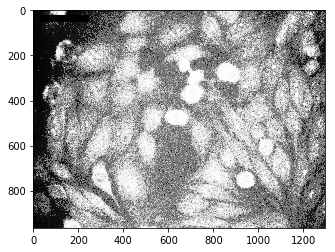

In [93]:
plt.imshow(eq, cmap='gray')

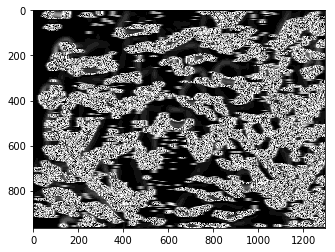

In [101]:
grad = gaussian_gradient_magnitude(eq, sigma=10)
grad 
plt.imshow(grad, cmap='gray')